<a href="https://colab.research.google.com/github/dinno797/Oral-Cancer-Detection/blob/main/Oral_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanush366","key":"d619555382a42e35ad31aeec49abafed"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashenafifasilkebede/dataset

Dataset URL: https://www.kaggle.com/datasets/ashenafifasilkebede/dataset
License(s): CC0-1.0


In [ ]:
import zipfile
import os

# Define the path where the ZIP file is downloaded
zip_path = "/content/dataset.zip"  # Change this path to where your ZIP file is

# Define the directory where you want to extract the files
extract_dir = "/content/oral_cancer_dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Define the custom augmentation function first
def custom_augment(img):
    img = tf.image.random_brightness(img, max_delta=0.1)
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.random_hue(img, max_delta=0.05)
    img = tf.image.random_saturation(img, lower=0.8, upper=1.2)
    return img

# Define the paths to your dataset
dataset_path = "/content/oral_cancer_dataset"  # Change this if your path is different
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

# Image data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',brightness_range=(0.8, 1.2),
    preprocessing_function=custom_augment # Now custom_augment is defined
)


# Only rescale validation and test data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)



# Load training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='binary'  # Use 'binary' for 2 classes (Normal, OSCC)
)
import tensorflow as tf

def custom_augment(img):
    img = tf.image.random_brightness(img, max_delta=0.1)
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.random_hue(img, max_delta=0.05)
    img = tf.image.random_saturation(img, lower=0.8, upper=1.2)
    return img

# Load validation dataset
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print("Dataset loaded successfully! 🎉")


Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.
Dataset loaded successfully! 🎉


Class Indices: {'Normal': 0, 'OSCC': 1}


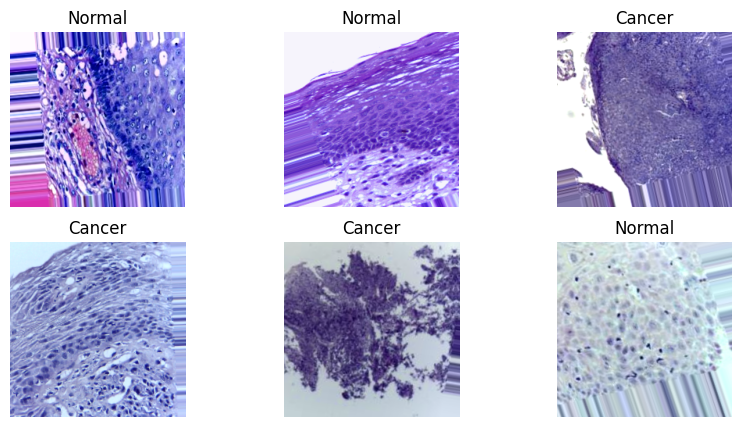

In [ ]:
# Check class labels assigned
print("Class Indices:", train_generator.class_indices)

# Display a sample batch of images
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images
sample_images, sample_labels = next(train_generator)

# Plot the images
plt.figure(figsize=(10, 5))
for i in range(6):  # Show 6 images
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title("Cancer" if sample_labels[i] == 1 else "Normal")
    plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # Block 1
    Conv2D(32, (3,3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),

    # Block 2
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),

    # Block 3
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),

    # Block 4 (New Block)
    Conv2D(256, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,821,313 (26.02 MB)

 Trainable params: 6,820,353 (26.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load base model
base_model_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers initially
for layer in base_model_vgg.layers:
    layer.trainable = False

# Unfreeze last few layers for fine-tuning
for layer in base_model_vgg.layers[-8:]:
    layer.trainable = True

# Custom top layers
x = GlobalAveragePooling2D()(base_model_vgg.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Final model
vgg19_model = Model(inputs=base_model_vgg.input, outputs=output)

# Compile with low learning rate
vgg19_model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
vgg19_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,190,273 (77.02 MB)

 Trainable params: 14,323,969 (54.64 MB)

 Non-trainable params: 5,866,304 (22.38 MB)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load the base ResNet50 model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers initially
for layer in base_model_resnet.layers:
    layer.trainable = False

# Unfreeze last 10 layers for fine-tuning
for layer in base_model_resnet.layers[-10:]:
    layer.trainable = True

# Add custom layers
x = GlobalAveragePooling2D()(base_model_resnet.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Final model
resnet50_model = Model(inputs=base_model_resnet.input, outputs=output)

# Compile
resnet50_model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
resnet50_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,146,817 (92.11 MB)

 Trainable params: 5,024,001 (19.17 MB)

 Non-trainable params: 19,122,816 (72.95 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enhanced ImageDataGenerator for training with advanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixel values
    rotation_range=25,             # Random rotations up to 25 degrees
    width_shift_range=0.2,         # Horizontal shifts
    height_shift_range=0.2,        # Vertical shifts
    shear_range=0.2,               # Shear transformations
    zoom_range=0.25,               # Random zoom
    brightness_range=[0.8, 1.2],   # Simulated lighting changes (color jittering)
    channel_shift_range=30.0,      # Color/channel variation
    horizontal_flip=True,          # Flip images
    fill_mode='nearest'            # Filling strategy for rotations/shifts
)

# For validation and testing: only rescale (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    "oral_cancer_dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    "oral_cancer_dataset/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    "oral_cancer_dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
cnn_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 146s 864ms/step - accuracy: 0.5470 - loss: 1.3166 - val_accuracy: 0.2333 - val_loss: 1.0373
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 122s 786ms/step - accuracy: 0.5788 - loss: 0.8955 - val_accuracy: 0.2417 - val_loss: 0.9358
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 141s 782ms/step - accuracy: 0.5788 - loss: 0.8735 - val_accuracy: 0.5500 - val_loss: 0.8116
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 769ms/step - accuracy: 0.6042 - loss: 0.8412 - val_accuracy: 0.6333 - val_loss: 0.7411
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 775ms/step - accuracy: 0.5641 - loss: 0.8389 - val_accuracy: 0.7417 - val_loss: 0.7134
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 780ms/step - accuracy: 0.6229 - loss: 0.7998 - val_accuracy: 0.6917 - val_loss: 0.6629
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 125s 807ms/step - accuracy: 0.5792 - loss: 0.8029 - val_accuracy: 0.6583 - val_loss: 0.6625
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 765ms/step - accuracy: 0.6069 -

In [ ]:
vgg_history = vgg19_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.6278 - loss: 0.7296 - val_accuracy: 0.7333 - val_loss: 0.5458
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 136s 879ms/step - accuracy: 0.7275 - loss: 0.5853 - val_accuracy: 0.7833 - val_loss: 0.4381
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 140s 904ms/step - accuracy: 0.7700 - loss: 0.5106 - val_accuracy: 0.7833 - val_loss: 0.4792
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 134s 863ms/step - accuracy: 0.8062 - loss: 0.4359 - val_accuracy: 0.7750 - val_loss: 0.5678
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 132s 850ms/step - accuracy: 0.8171 - loss: 0.4189 - val_accuracy: 0.8333 - val_loss: 0.5189
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 135s 871ms/step - accuracy: 0.8395 - loss: 0.3766 - val_accuracy: 0.8333 - val_loss: 0.6368
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 134s 862ms/step - accuracy: 0.8679 - loss: 0.3220 - val_accuracy: 0.8333 - val_loss: 0.5631
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 141s 856ms/step - accuracy: 0.8715 - lo

In [ ]:
resnet_history = resnet50_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 158s 898ms/step - accuracy: 0.5088 - loss: 0.8944 - val_accuracy: 0.7667 - val_loss: 0.5555
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 779ms/step - accuracy: 0.5322 - loss: 0.8194 - val_accuracy: 0.7667 - val_loss: 0.6179
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 781ms/step - accuracy: 0.5683 - loss: 0.7700 - val_accuracy: 0.7750 - val_loss: 0.5441
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 781ms/step - accuracy: 0.5936 - loss: 0.7708 - val_accuracy: 0.7833 - val_loss: 0.5362
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 781ms/step - accuracy: 0.5797 - loss: 0.7761 - val_accuracy: 0.6333 - val_loss: 0.6370
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 127s 818ms/step - accuracy: 0.6000 - loss: 0.7471 - val_accuracy: 0.7667 - val_loss: 0.5395
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 778ms/step - accuracy: 0.5755 - loss: 0.7668 - val_accuracy: 0.7417 - val_loss: 0.5297
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 123s 794ms/step - accuracy: 0.5963 -

In [ ]:
test_loss, test_acc = resnet50_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6498 - loss: 0.8783
Test Accuracy: 79.37%


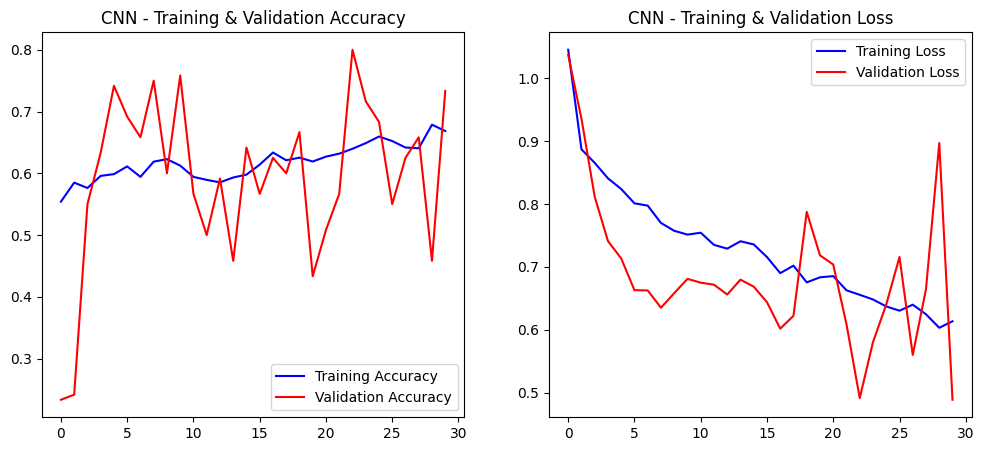

In [ ]:
import matplotlib.pyplot as plt

# Function to plot accuracy & loss
def plot_performance(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title(f'{model_name} - Training & Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(f'{model_name} - Training & Validation Loss')
    plt.legend()

    plt.show()

# Plot for CNN Model
plot_performance(cnn_history, "CNN")


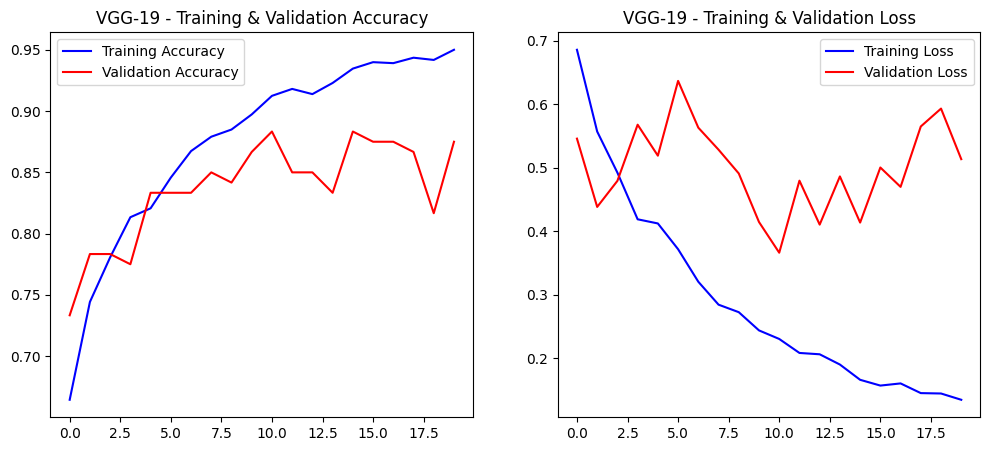

In [ ]:
plot_performance(vgg_history, "VGG-19")


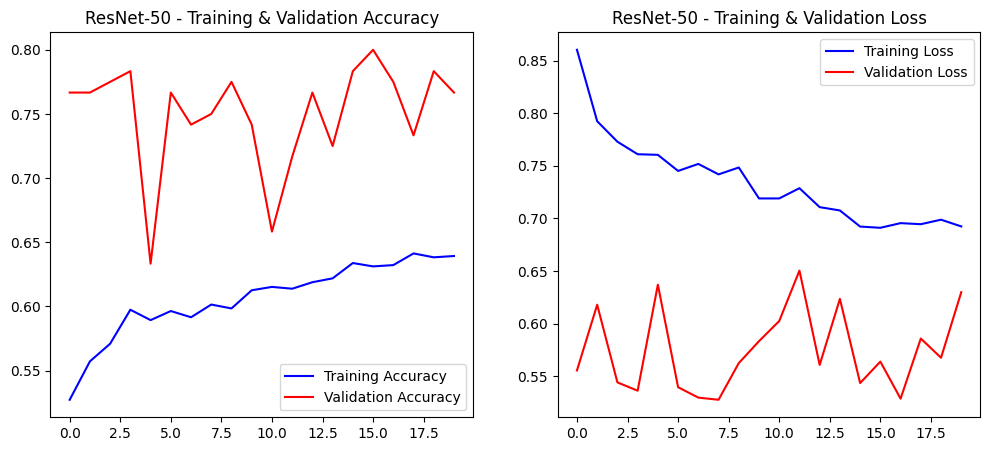

In [ ]:
plot_performance(resnet_history, "ResNet-50")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Step 1: Get predictions from the model
# Assuming you're using test_generator
predictions = model.predict(test_generator)
y_pred = np.where(predictions > 0.5, 1, 0)  # Convert probabilities to 0/1
y_true = test_generator.classes              # True labels

# Step 2: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "OSCC"]))

# Optional: You can also print individual scores
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("✅ Evaluation Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.54      0.61      0.58        31
        OSCC       0.87      0.83      0.85        95

    accuracy                           0.78       126
   macro avg       0.71      0.72      0.71       126
weighted avg       0.79      0.78      0.78       126

✅ Evaluation Metrics:
Accuracy : 0.7778
Precision: 0.8681
Recall   : 0.8316
F1-Score : 0.8495
